In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
sys.path.append('d:/ariel2/code/core/')
sys.path.append('/kaggle/input/my-ariel2-library')
import kaggle_support as kgs
import ariel_model
import ariel_simple
import ariel_gp
import ariel_load
import os
import numpy as np
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
kgs.debugging_mode = 1

local


In [2]:
train_data = kgs.load_all_train_data()
train_data = train_data[:3]

In [3]:
todo = dict()

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
todo['Baseline GP'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):    
#     model.model.starter_model.loaders[ii].apply_full_sensor_corrections.use_pca_for_background_removal = True
# model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_n_rows = 8
# model.model.starter_model.loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
# model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = True
# todo['New mean removal'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):    
#     model.model.starter_model.loaders[ii].apply_full_sensor_corrections.use_pca_for_background_removal = True
# model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_n_rows = 8
# model.model.starter_model.loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
# model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = True
# model.model.starter_model.loaders[0].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
# model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
# # todo['New mean removal and FGS upgrade'] = model

model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
model.model.run_in_parallel = True
for ii in range(2):    
    model.model.starter_model.loaders[ii].apply_full_sensor_corrections.use_pca_for_background_removal = True
model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_n_rows = 8
model.model.starter_model.loaders[0].apply_full_sensor_corrections.remove_background_based_on_pixels = True
model.model.starter_model.loaders[1].apply_full_sensor_corrections.remove_background_based_on_rows = True
model.model.starter_model.loaders[0].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
model.model.starter_model.loaders[0].apply_full_sensor_corrections.inpainting_2d = False
todo['New mean removal and FGS upgrade no inpaint'] = model


# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False
#     model.model.starter_model.loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
# model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
# model.model.starter_model.loaders[1].apply_wavelength_binning.options.n_components = 3
# todo['New preprocessing'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_pixel_corrections.poke_holes = True
# todo['Baseline GP, holes'] = model

# model = ariel_model.Fudger(model=ariel_gp.PredictionModel())
# model.model.run_in_parallel = True
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_full_sensor_corrections.remove_background_remove_used_rows = False
#     model.model.starter_model.loaders[ii].apply_wavelength_binning = ariel_load.ApplyWavelengthBinning2()
# model.model.starter_model.loaders[0].apply_wavelength_binning.options.n_components = 4
# model.model.starter_model.loaders[1].apply_wavelength_binning.options.n_components = 3
# for ii in range(2):
#     model.model.starter_model.loaders[ii].apply_pixel_corrections.poke_holes = True
# todo['New preprocessing, holes'] = model

In [4]:
kgs.sanity_checks_active = True
def fname(k):
    return kgs.temp_dir + 'evaluate_model_'+k+'__'+str(len(train_data))+'.pickle'
for k,v in todo.items():
    if not os.path.isfile(fname(k)):
        print(k)
        model = copy.deepcopy(v)
        
        # Precache data
        for d in tqdm(train_data):
            copy.deepcopy(d).load_to_step(5,model.model.starter_model.loaders)
        
        
        model.train(train_data)
        inferred_data = model.infer(train_data)
        print(k)
        kgs.score_metric(inferred_data, train_data)
        kgs.dill_save(fname(k), (inferred_data,model,kgs.git_commit_id))
    else:
        print(k)
        (inferred_data,model,_) = kgs.dill_load(fname(k))
        kgs.score_metric(inferred_data, train_data)

Baseline GP


Processing in parallel:   0%|                                                                     | 0/3 [00:00<?, ?it/s]

local
local
local
SpawnPoolWorker-1SpawnPoolWorker-2 2
 1
CUDA_VISIBLE_DEVICES= CUDA_VISIBLE_DEVICES=0 
0
SpawnPoolWorker-3 3
CUDA_VISIBLE_DEVICES= 0


Processing in parallel: 100%|█████████████████████████████████████████████████████████████| 3/3 [00:24<00:00,  8.30s/it]


Opt time 13.27191686630249
Baseline GP
Score:          0.7216
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm
New mean removal and FGS upgrade no inpaint
Score:          0.7216
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm


Baseline GP
[0.9949015342610077, 0.9976926070016425]
[6.370472636898617e-06, 6.227122666042634e-06]
[0.7975024479117357, 0.6867946154646121]
Score:          0.7216
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm

20
Score:          0.7216
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm

No fudge
Score:          0.7092
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm


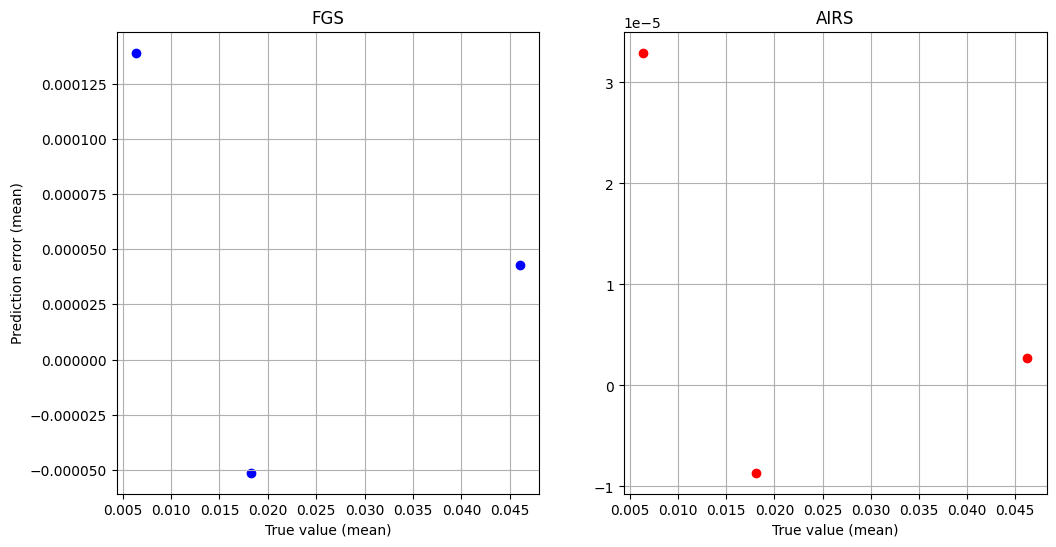

FGS
1873185, ratio:1.076, x:1.291e-04, y:1.390e-04, RMS:3.407e-05
34983, ratio:0.761, x:6.734e-05, y:-5.126e-05, RMS:2.315e-05
3849793, ratio:0.395, x:1.084e-04, y:4.283e-05, RMS:5.959e-05
AIRS
1873185, ratio:0.397, x:8.308e-05, y:3.294e-05, RMS:3.407e-05
34983, ratio:0.292, x:2.961e-05, y:-8.647e-06, RMS:2.315e-05
3849793, ratio:0.055, x:5.014e-05, y:2.757e-06, RMS:5.959e-05


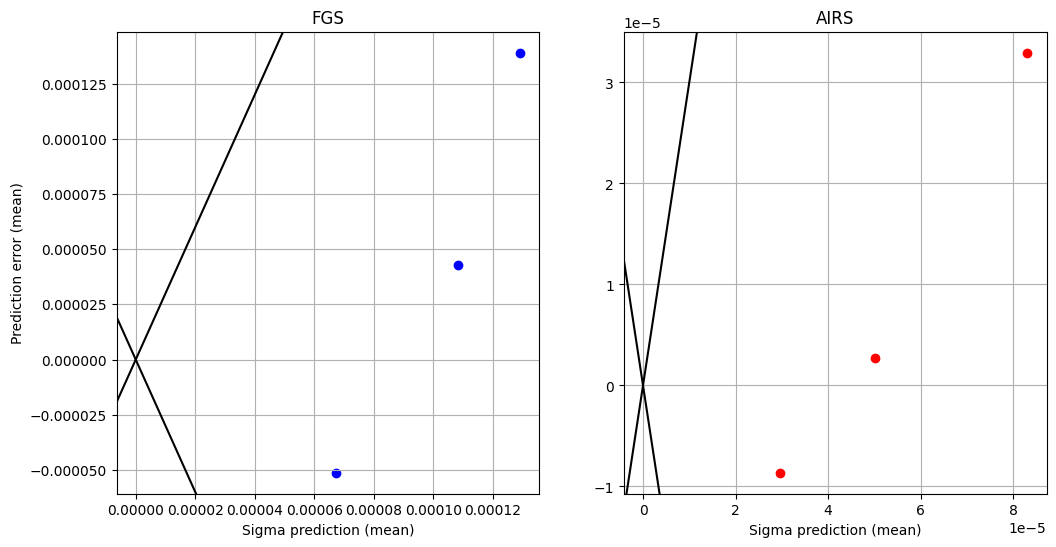

AIRS variation
3849793, ratio:1.177, x:5.061e-05, y:5.958e-05, RMS:5.959e-05
34983, ratio:1.124, x:1.895e-05, y:2.131e-05, RMS:2.315e-05
1873185, ratio:0.216, x:1.544e-05, y:3.330e-06, RMS:3.407e-05


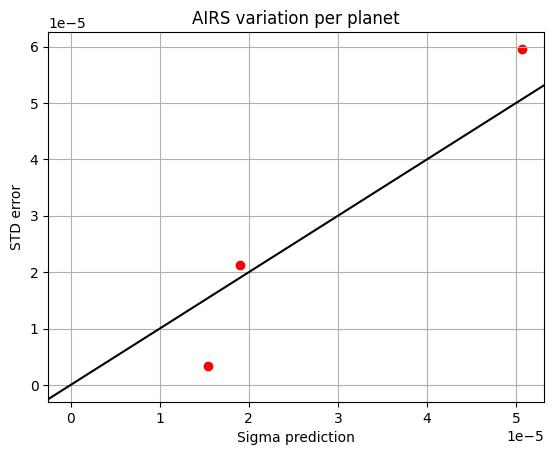

New mean removal and FGS upgrade no inpaint
[0.9949015342610077, 0.9976926070016425]
[6.370472636898617e-06, 6.227122666042634e-06]
[0.7975024479117357, 0.6867946154646121]
Score:          0.7216
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm

20
Score:          0.7216
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm

No fudge
Score:          0.7092
RMS error FGS:  89.04 ppm
RMS error AIRS: 41.56 ppm


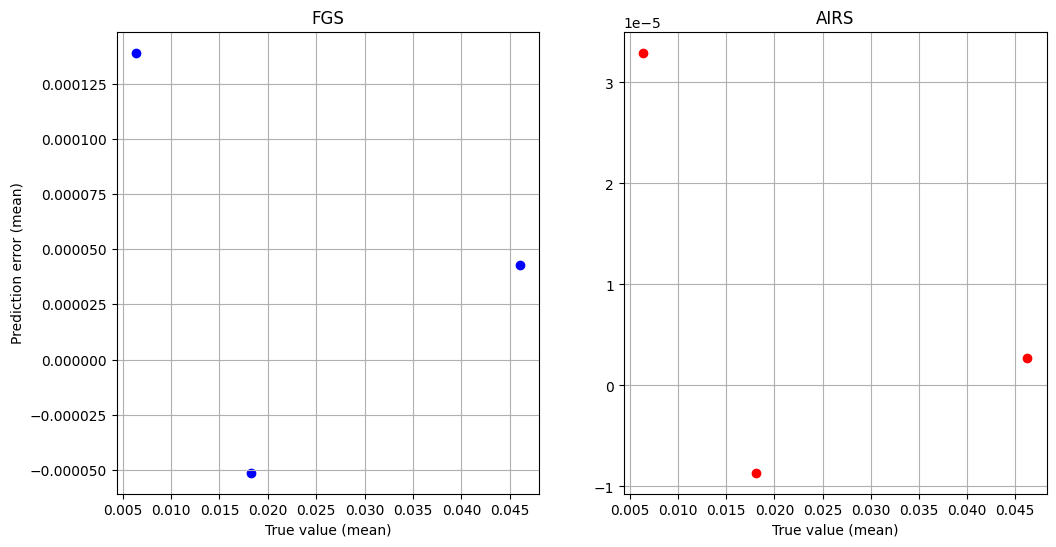

FGS
1873185, ratio:1.076, x:1.291e-04, y:1.390e-04, RMS:3.407e-05
34983, ratio:0.761, x:6.734e-05, y:-5.126e-05, RMS:2.315e-05
3849793, ratio:0.395, x:1.084e-04, y:4.283e-05, RMS:5.959e-05
AIRS
1873185, ratio:0.397, x:8.308e-05, y:3.294e-05, RMS:3.407e-05
34983, ratio:0.292, x:2.961e-05, y:-8.647e-06, RMS:2.315e-05
3849793, ratio:0.055, x:5.014e-05, y:2.757e-06, RMS:5.959e-05


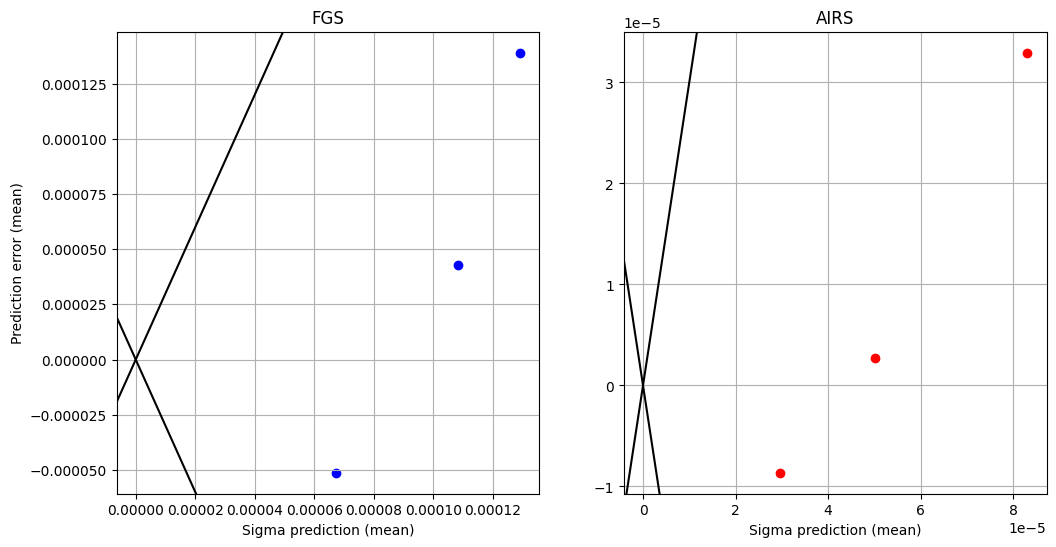

AIRS variation
3849793, ratio:1.177, x:5.061e-05, y:5.958e-05, RMS:5.959e-05
34983, ratio:1.124, x:1.895e-05, y:2.131e-05, RMS:2.315e-05
1873185, ratio:0.216, x:1.544e-05, y:3.330e-06, RMS:3.407e-05


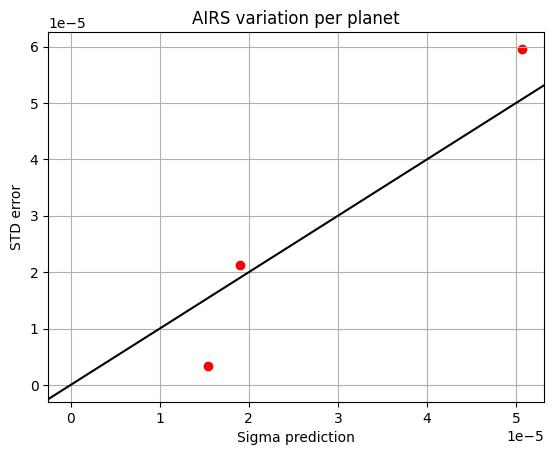

In [5]:
def basics():
    plt.grid(True)
    plt.box(True)
def plot_two_sensors(func, xl, yl, mod):
    _,ax = plt.subplots(1,2,figsize=(12,6))
    plt.sca(ax[0]);basics()
    plt.title('FGS')
    plt.xlabel(xl)
    plt.ylabel(yl)
    func(slice(0,1), 'blue', 'FGS')
    mod()
    
    plt.sca(ax[1]);basics()
    plt.title('AIRS')
    plt.xlabel(xl)
    func(slice(1,283), 'red', 'AIRS')
    mod()
    
    plt.pause(0.001)

def report_extreme_ratios(x,y,name):
    print(name)
    inds = np.argsort(np.abs(y/x))[::-1]
    for ii in inds[:5]:
        print(f'{inferred_data[ii].planet_id}, ratio:{np.abs(y[ii]/x[ii]):.3f}, x:{x[ii]:.3e}, y:{y[ii]:.3e}, RMS:{kgs.rms(error_matrix[ii,:]):.3e}')
    
    
for k,v in todo.items():
    (inferred_data,model,_) = kgs.dill_load(fname(k))
    #model.bias_a[0]+=0.006
    #model.bias_a[1]-=0.0002
    #inferred_data = model.infer(train_data)
    print(k)
    print(model.bias_a)
    print(model.bias_b)
    print(model.sigma_fudge)
    kgs.score_metric(inferred_data, train_data)
    print('')
    print('20')
    kgs.score_metric(inferred_data[:20], train_data[:20]) 
    print('')
    print('No fudge')
    model.sigma_fudge = [1,1]
    #model.bias_a = [1,1]
    #model.bias_b = [0,0]
    # print('!!!')
    inferred_data = model.infer(train_data)
    kgs.score_metric(inferred_data, train_data)     
    error_matrix = np.array([d.spectrum - t.spectrum for d,t in zip(inferred_data,train_data)])
    true_matrix = np.array([t.spectrum for d,t in zip(inferred_data,train_data)])
    
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(true_matrix[:,slic],1)
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        
    plot_two_sensors(plot_prediction_vs_true, 'True value (mean)', 'Prediction error (mean)', lambda:0)
    
    def plot_mean_error_vs_sigma(slic,col, name):
        x = [np.sqrt(np.sum(d.spectrum_cov[slic,slic])/(slic.stop-slic.start)**2) for d in inferred_data]
        y = np.mean(error_matrix[:,slic],1)
        plt.scatter(x,y,color = col)
        report_extreme_ratios(x,y,name)
    def mod():
        plt.axline((0,0), slope=3, color='black')
        plt.axline((0,0), slope=-3, color = 'black')        
    plot_two_sensors(plot_mean_error_vs_sigma, 'Sigma prediction (mean)', 'Prediction error (mean)', mod)
    
    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel('Sigma prediction')
    plt.ylabel('STD error')
    n=282
    x=np.sqrt([(np.trace(d.spectrum_cov[1:,1:]) - np.sum(d.spectrum_cov[1:,1:]) / n) / n for d in inferred_data])
    y=np.sqrt(np.var(error_matrix[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    report_extreme_ratios(x,y,'AIRS variation')    
    plt.pause(0.001)

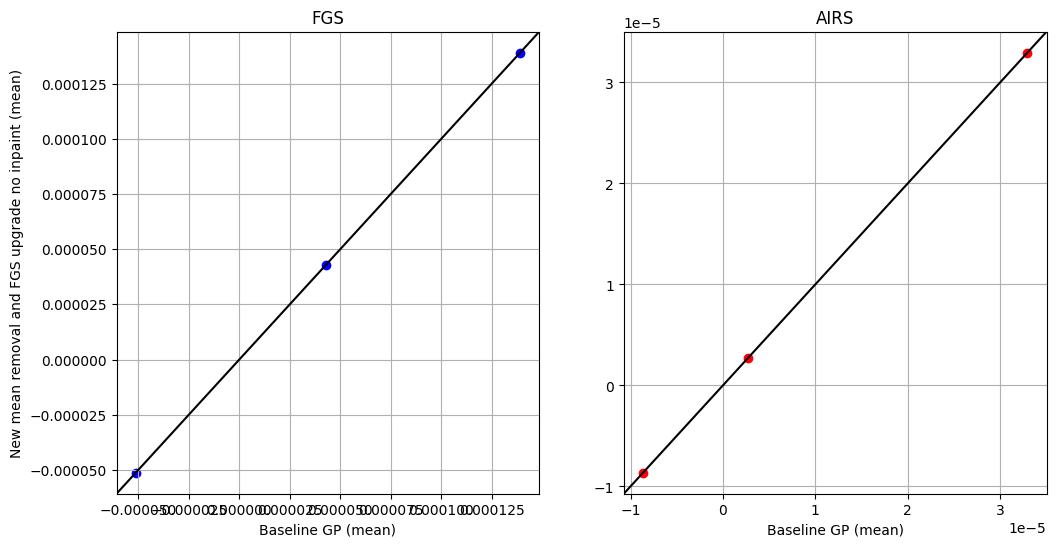

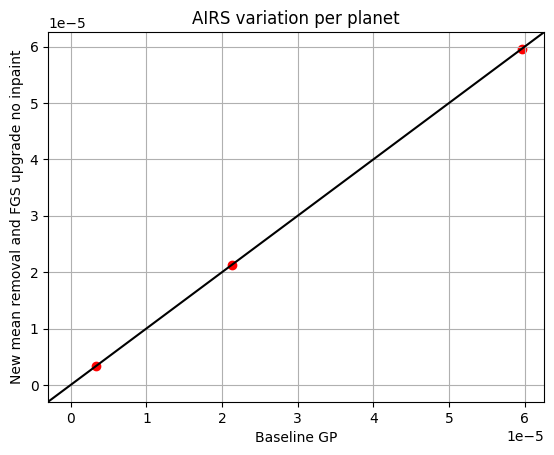

In [6]:
compare1= list(todo.keys())[0]
data1 = kgs.dill_load(fname(compare1))[0]
for k,v in todo.items():    
    compare2= k
    if compare2==compare1:
        continue    
    data2 = kgs.dill_load(fname(compare2))[0]
    error1 = np.array([d.spectrum - t.spectrum for d,t in zip(data1,train_data)])
    error2 = np.array([d.spectrum - t.spectrum for d,t in zip(data2,train_data)])
    def plot_prediction_vs_true(slic, col, name):
        x = np.mean(error1[:,slic],1)
        y = np.mean(error2[:,slic],1)
        plt.scatter(x,y,color = col)

    plot_two_sensors(plot_prediction_vs_true, compare1+' (mean)', compare2+' (mean)', lambda:plt.axline((0,0),slope=1,color='black'))

    plt.figure(); basics()
    plt.title('AIRS variation per planet')
    plt.xlabel(compare1)
    plt.ylabel(compare2)
    x=np.sqrt(np.var(error1[:,1:],1))
    y=np.sqrt(np.var(error2[:,1:],1))
    plt.scatter(x, y, color='red')
    plt.axline((0,0), slope=1, color='black')
    plt.pause(0.001)

In [7]:
# import subprocess

# # Hibernate Windows
# subprocess.run(
#     ["/mnt/c/Windows/System32/shutdown.exe", "/h"],  # add "/f" to force-close apps
#     check=True
# )